In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import altair as alt
# alt.enable_mime_rendering()

In [10]:
df = pd.read_csv("data/Lekagul-Sensor-Data.csv")
data = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})
data

,a,b
0,C,2
1,C,7
2,C,4
3,D,1
4,D,2
5,D,6
6,E,8
7,E,4
8,E,7


In [11]:
chart = alt.Chart(data).mark_point()
chart

In [3]:
df.shape

(171477, 4)

In [4]:
df.columns

Index(['Timestamp', 'car-id', 'car-type', 'gate-name'], dtype='object')

In [5]:
df.head(10)

,Timestamp,car-id,car-type,gate-name
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2
5,2015-05-01 01:24:02,20154301124328-262,4,general-gate5
6,2015-05-01 01:31:41,20153101013141-937,1,entrance3
7,2015-05-01 01:33:57,20154301124328-262,4,entrance4
8,2015-05-01 01:53:34,20153101013141-937,1,general-gate1
9,2015-05-01 01:56:20,20153101013141-937,1,ranger-stop2


In [6]:
df.dtypes

Timestamp    object
car-id       object
car-type     object
gate-name    object
dtype: object

In [13]:
chart = alt.Chart(df.sample(100)).mark_point()
chart

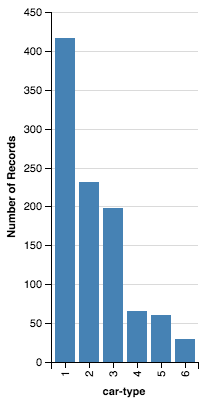

In [26]:
chart = alt.Chart(df[df["gate-name"] == "entrance1"].sample(1000)).mark_bar().encode(x='car-type:N',y='count(*):Q')
chart

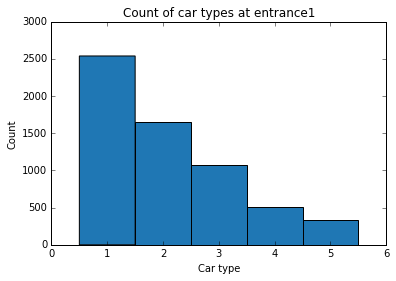

In [25]:
plt.hist(pd.to_numeric(df[df["gate-name"] == "entrance1"]["car-type"]),bins=np.arange(6)+0.5,color=np.array((31, 119, 180))/255)
plt.xlabel("Car type")
plt.ylabel("Count")
_ = plt.title("Count of car types at entrance1")

In [ ]:
df.loc[df["car-type"] == '2P',["car-type"]] = '7'

In [ ]:
for gate in df["gate-name"].unique():
    if "entrance" in gate:
        plt.figure()
        plt.hist(pd.to_numeric(df[df["gate-name"] == gate]["car-type"]),bins=np.arange(7)+0.5,color=np.array((31, 119, 180))/255)
        plt.xlabel("Car type")
        plt.ylabel("Count")
        plt.title("Count of car types at {}".format(gate))

In [ ]:
plt.plot(pd.to_datetime(df["Timestamp"]),np.ones(df.shape[0]))

In [ ]:
g = df.groupby(pd.DatetimeIndex(pd.to_datetime(df["Timestamp"])).date)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(g.count().index,g.count().Timestamp)

In [ ]:
g = df.groupby([pd.DatetimeIndex(pd.to_datetime(df["Timestamp"])).date,"car-type"])

In [ ]:
g.count()

In [ ]:
g.count().Timestamp

In [ ]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [ ]:
plt.figure(figsize=(15,8))
for car_type in df["car-type"].unique():
    g = df[df["car-type"] == car_type].groupby(pd.DatetimeIndex(df[df["car-type"] == car_type]["Timestamp"]).date)
    plt.plot(g.count().index,g.count().Timestamp,label=car_type)
plt.legend()

In [ ]:
plt.figure(figsize=(15,8))
for car_type in df["car-type"].unique():
    g = df[df["car-type"] == car_type].groupby(pd.DatetimeIndex(df[df["car-type"] == car_type]["Timestamp"]).hour)
    plt.plot(g.count().index,g.count().Timestamp,label=car_type)
plt.legend()

In [ ]:
plt.figure(figsize=(10,5))
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
prev = np.zeros(7)
for i,car_type in enumerate(df["car-type"].unique()):
    g = df[df["car-type"] == car_type].groupby(pd.DatetimeIndex(df[df["car-type"] == car_type]["Timestamp"]).dayofweek)
    plt.bar(g.count().index,g.count().Timestamp,label=car_type,bottom=prev,color=np.array(tableau20[i])/255)
    # plt.bar(g.count().index,g.count().Timestamp,label=car_type,color=np.array(tableau20[i])/255)
    prev += g.count().Timestamp.values
plt.bar(np.arange(8),np.zeros(8))
plt.legend(loc="best")
plt.ylabel("Count")
plt.xlabel("Day of Week")
plt.title("Visits by day of each car type")

In [ ]:
plt.bar?

In [ ]:
plt.figure(figsize=(15,8))
for i,car_type in enumerate(df["car-type"].unique()):
    g = df[df["car-type"] == car_type].groupby(pd.DatetimeIndex(df[df["car-type"] == car_type]["Timestamp"]).date)
    plt.plot(g.count().index,g.count().Timestamp,label=car_type,color=np.array(tableau20[i])/255,linewidth=1.5)
plt.legend()